In [1]:
#Import libraries
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as iter
import matplotlib.colors as color
from _collections_abc import Callable
sb.set()
plt.show()

In [2]:
dataPull = pd.read_csv("archive//cardio_train.csv", delimiter=";")
dataPull.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
dataPull.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:

def pullBloodPressureAnomalies(typeb : str, dataPullIn):
    """Print out the range of data pull for typeb into an output txt file for me to determine extreme outliers."""
    typedecode = "systolic" if typeb == "ap_hi" else "diastolic"
    s_k0 = dataPullIn[typeb].value_counts(ascending=True)
    s_k1 = list(s_k0.keys())
    s_k1.sort(reverse=True)
    f = open("output.txt", "w")
    f.write(typeb + " Value : Frequency\r\n")
    f.write(typeb + " is " + typedecode + " blood pressure.\n")
    for i in s_k1:
        f.write(str(i) + "--> T::" + str(s_k0[i]) + "\n")
    f.close()

In [5]:
pullBloodPressureAnomalies('ap_lo', dataPull)

In [6]:
#This data is pulled from: 
#https://www.kaggle.com/code/bhargavi35/starter-cardiovascular-disease-dataset-d2fc2521-9

# Description
Features:

Age | Objective Feature | age | int (days) <br>
Height | Objective Feature | height | int (cm) |<br>
Weight | Objective Feature | weight | float (kg) |<br>
Gender | Objective Feature | gender | categorical code |<br>
Systolic blood pressure | Examination Feature | ap_hi | int |<br>
Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
Smoking | Subjective Feature | smoke | binary |<br>
Alcohol intake | Subjective Feature | alco | binary |<br>
Physical activity | Subjective Feature | active | binary |<br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br>

In [7]:
def filterOut(filter_cond : list, dataMatrix):
    """Filter out useless data from the dataMatrix."""
    k = [x for x in dataMatrix.columns if x not in filter_cond]
    return pd.DataFrame(dataMatrix[k])

In [8]:
#get rid of id, it is useless.
filter_k = ["ID ", "id", "id ", "ID"]
data = filterOut(filter_k, dataPull)
data.head(n = 20)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [9]:
#We need to change the categorical variables [gender, chol, gluc] and change the binary forms to TRUE and FALSE.
categorical = ['gender', 'cholesterol', 'gluc']
binForm = ["smoke", "alco", "active", "cardio"]
#to ease my life, I will make two functions. 
#Later I will map the gender column too, but be patient. 

In [10]:
def convertToBin(binary_slot : list, dataIn):
    """Convert the data in dataIn(1s to 0s) to True and False"""
    #first, copy the dataframe so upstream doesn't suffer. 
    data_tmp = dataIn.copy()
    data_tmp[binary_slot] = data_tmp[binary_slot].astype('bool')
    return data_tmp #I do not care about SettingWithCopyWarning. 

In [11]:
testdata = convertToBin(binForm, data)
#double check. 
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  bool   
 9   alco         70000 non-null  bool   
 10  active       70000 non-null  bool   
 11  cardio       70000 non-null  bool   
dtypes: bool(4), float64(1), int64(7)
memory usage: 4.5 MB


In [12]:
#now the data is proper. Let me display it. 
testdata.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,False,False,True,False
1,20228,1,156,85.0,140,90,3,1,False,False,True,True
2,18857,1,165,64.0,130,70,3,1,False,False,False,True
3,17623,2,169,82.0,150,100,1,1,False,False,True,True
4,17474,1,156,56.0,100,60,1,1,False,False,False,False


In [13]:
#Now I convert ages to approx. years, and height to metres for standardization. 
r = testdata['age'] / 365.24
testdata['age'] = r.astype('int')
testdata['height'] /= 100

In [14]:
#Warning: This function will overwrite all instances of dataIn. Use at your own risk. 
def mapdat(dataIn, columns_in : list, map_from : list, map_to : list):
    """Map from one list of values to another. I tried to use lambda functions but python is hard.
    Warning: This function overwrites the instance of dataIn. You would better know what you are doing if you
    use this."""
    for col in columns_in:
        for i in range(dataIn.shape[0]):
            content = dataIn[col][i]
            for j in range(len(map_from)):
                if content == map_from[j]:
                    content = map_to[j]
            dataIn[col][i] = content

In [15]:
categorical[1:]

['cholesterol', 'gluc']

In [16]:
#Then convert gender to actual gender
mapdat(testdata, [categorical[0]], map_from = [1, 2], map_to = ["Female", "Male"])
#Convert 1, 2, 3 to normal, above normal and well above normal. 
mapdat(testdata, categorical[1:], map_from = [1, 2, 3], map_to = ["Norm", "AbvNorm", "WellAbvNorm"])

C:\Users\TBNRd\AppData\Local\Temp\ipykernel_9092\890261517.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataIn[col][i] = content


In [17]:
#And we are now ready. 
testdata

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Male,1.68,62.0,110,80,Norm,Norm,False,False,True,False
1,55,Female,1.56,85.0,140,90,WellAbvNorm,Norm,False,False,True,True
2,51,Female,1.65,64.0,130,70,WellAbvNorm,Norm,False,False,False,True
3,48,Male,1.69,82.0,150,100,Norm,Norm,False,False,True,True
4,47,Female,1.56,56.0,100,60,Norm,Norm,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,Male,1.68,76.0,120,80,Norm,Norm,True,False,True,False
69996,61,Female,1.58,126.0,140,90,AbvNorm,AbvNorm,False,False,True,True
69997,52,Male,1.83,105.0,180,90,WellAbvNorm,Norm,False,True,False,True
69998,61,Female,1.63,72.0,135,80,Norm,AbvNorm,False,False,False,True


# Exploratory Analysis
 First, we deal with the categorical variables. 

In [18]:
cat_data = pd.DataFrame(testdata[categorical])
bin_data = pd.DataFrame(testdata[binForm])
cat_data.head(n = 19)

,gender,cholesterol,gluc
0,Male,Norm,Norm
1,Female,WellAbvNorm,Norm
2,Female,WellAbvNorm,Norm
3,Male,Norm,Norm
4,Female,Norm,Norm
5,Female,AbvNorm,AbvNorm
6,Female,WellAbvNorm,Norm
7,Male,WellAbvNorm,WellAbvNorm
8,Female,Norm,Norm
9,Female,Norm,Norm


In [19]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       70000 non-null  object
 1   cholesterol  70000 non-null  object
 2   gluc         70000 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [20]:
cat_data.describe()

,gender,cholesterol,gluc
count,70000,70000,70000
unique,2,3,3
top,Female,Norm,Norm
freq,45530,52385,59479


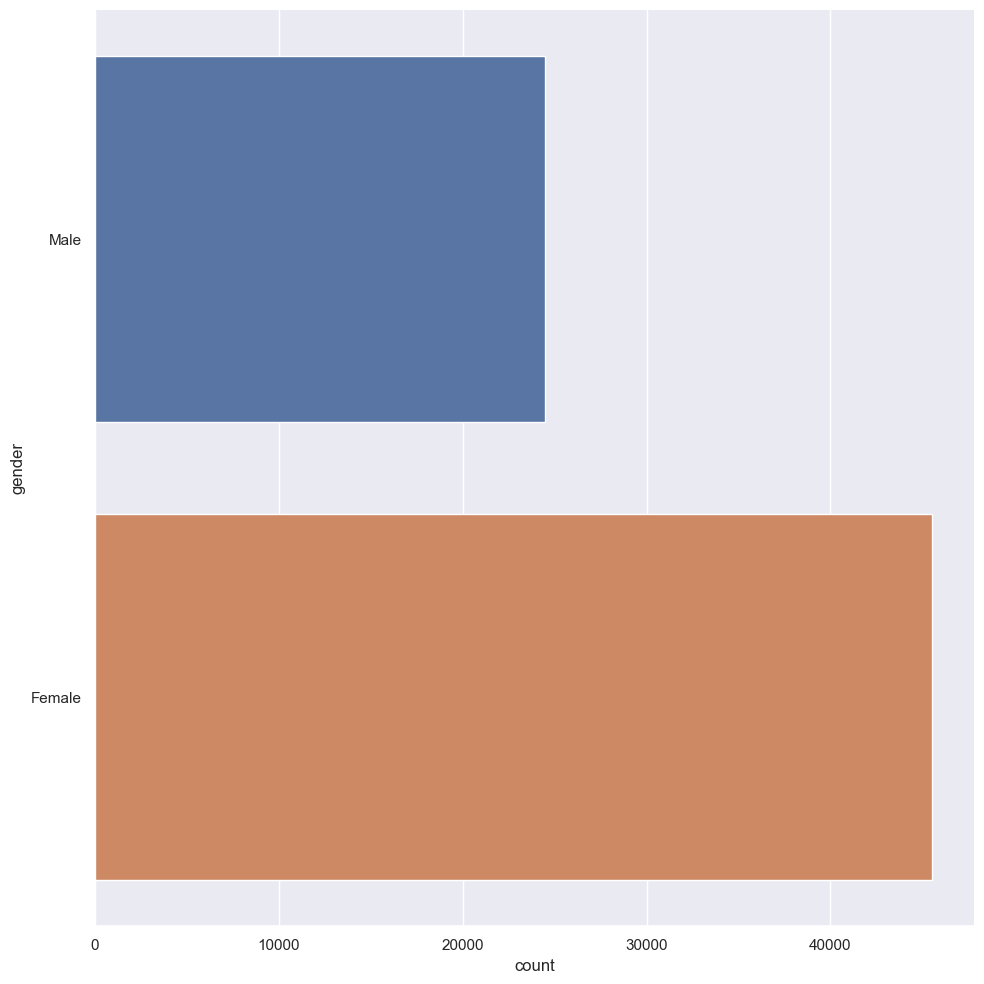

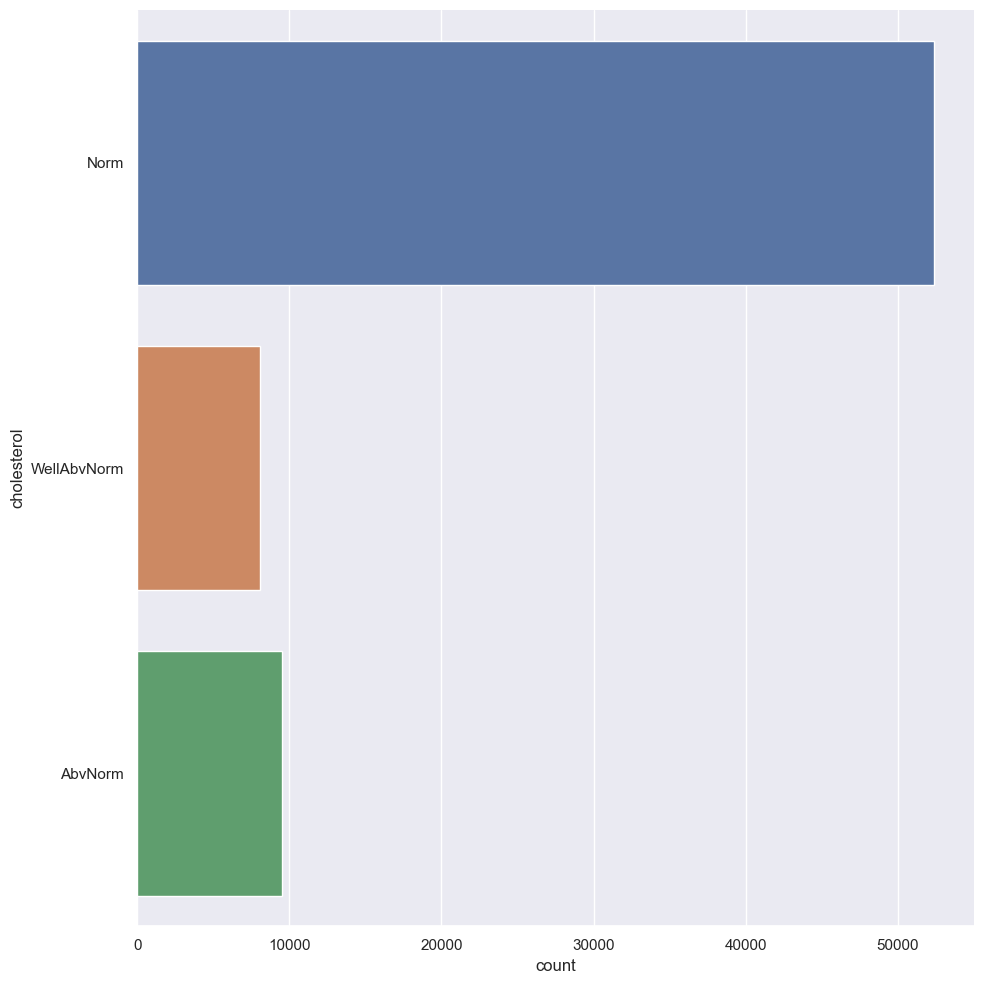

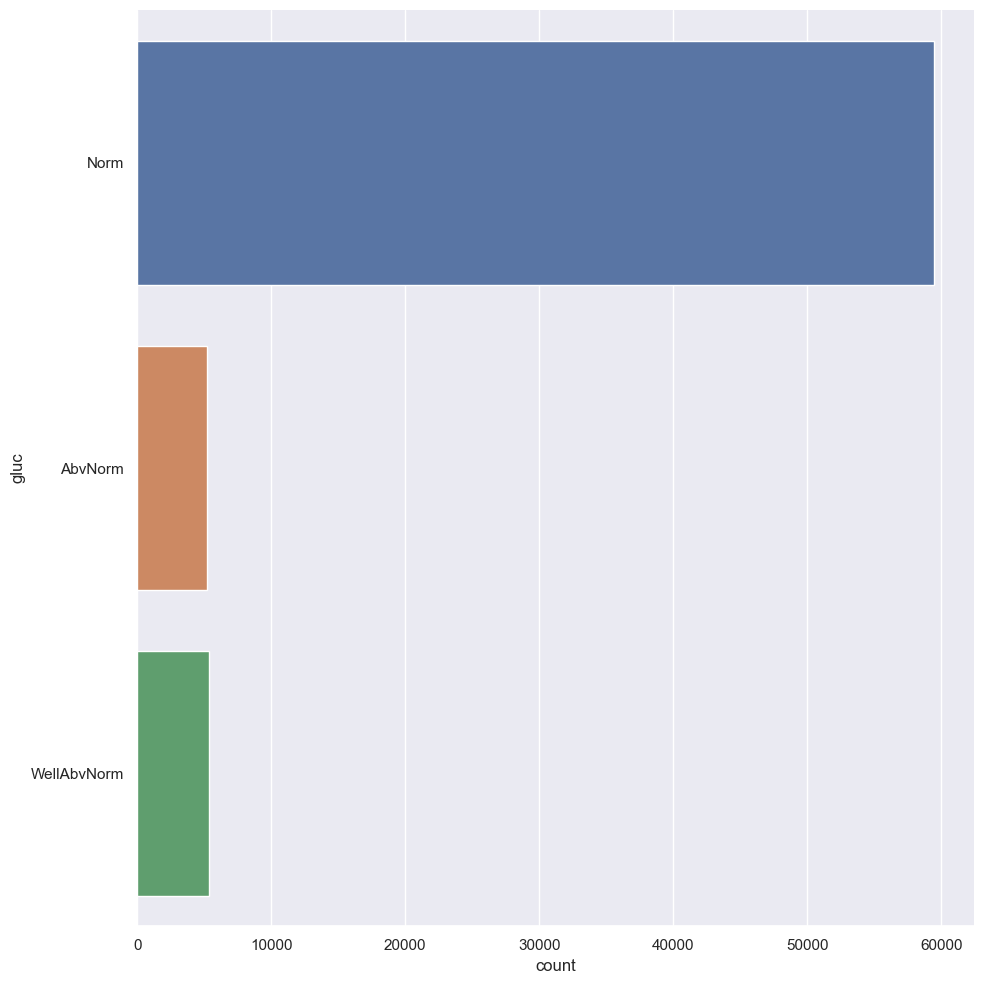

In [21]:
#catplot for all
for i in range(cat_data.shape[1]):
    sb.catplot(y = cat_data.columns[i], data = cat_data, kind = 'count', height = 10)

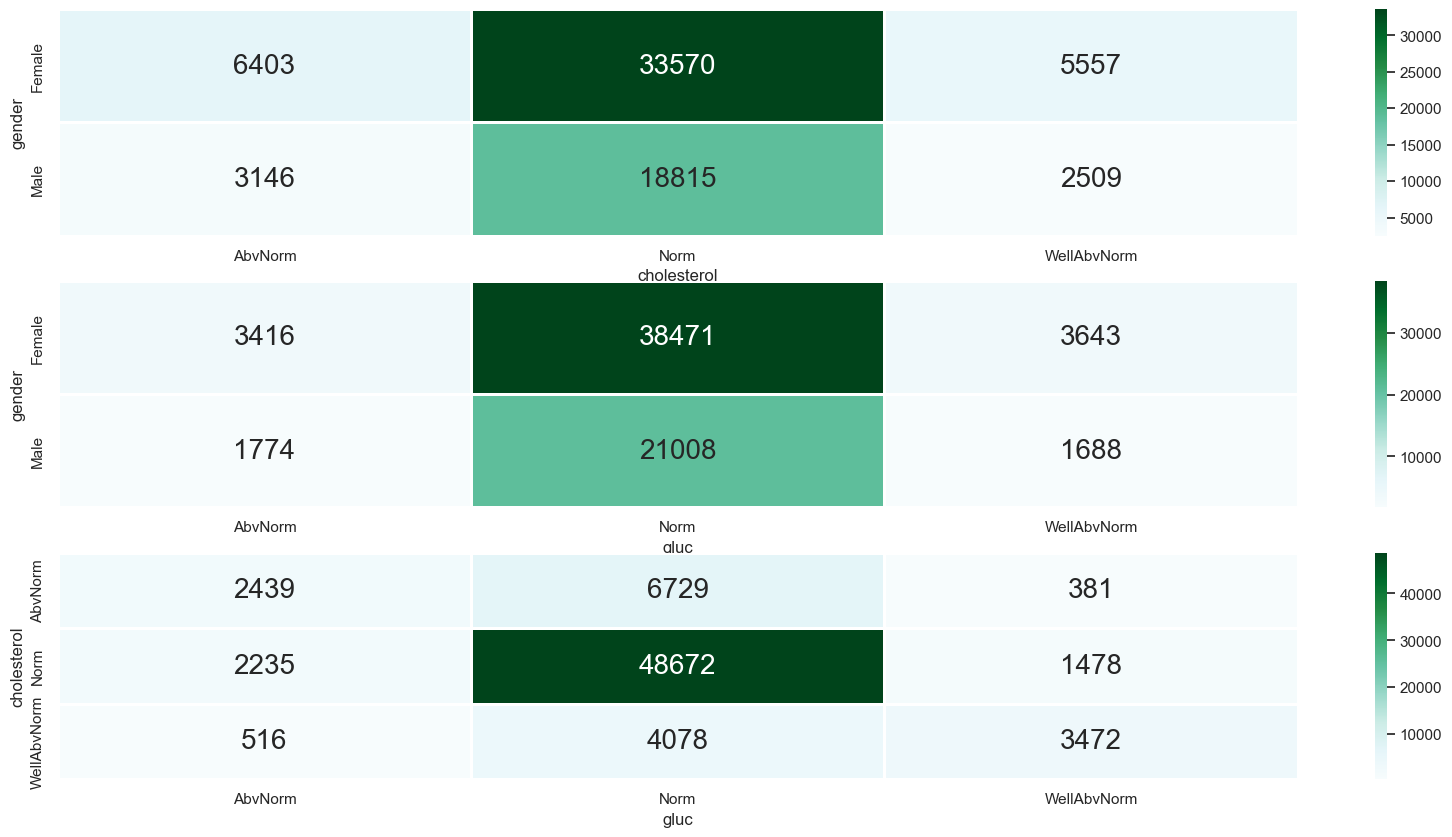

In [22]:
#get possible combinations
comby = list(iter.combinations(cat_data.columns, 2))
#then plot the heatmaps. 
f, axes = plt.subplots(3, 1, figsize = (20, 10))
for i in range(len(comby)):
    sb.heatmap(cat_data.groupby([comby[i][0], comby[i][1]]).size().unstack(),
               linewidths=1, annot=True, fmt='g', annot_kws={"size" : 20}, cmap = "BuGn", ax=axes[i])

Now I deal with the binary stuff

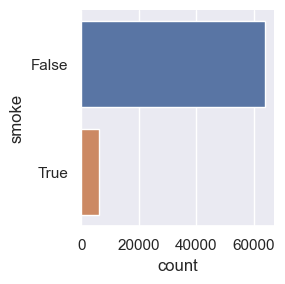

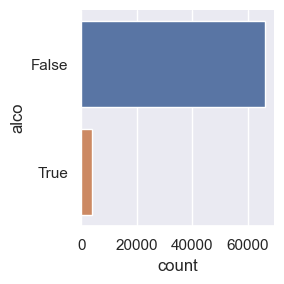

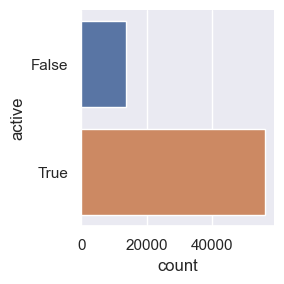

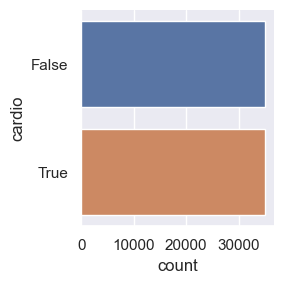

In [23]:
for col in binForm:
    sb.catplot(y = col, data = bin_data, height = 3, kind = 'count')

### TodoList:
1. Do data analysis for the non-categorical type to cardio. <br>
2. Do data analysis for categorical type ['cholesterol', 'gluc', 'Male', 'Smoke', 'alco', 'active'] map to ['cardio'].  

In [24]:
#now we convert the binaries to some value. I choose 100 and 0. 
testdatacopy = testdata.copy()
testdatacopy[binForm] = testdatacopy[binForm].astype('int') * 100
#check
testdatacopy

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Male,1.68,62.0,110,80,Norm,Norm,0,0,100,0
1,55,Female,1.56,85.0,140,90,WellAbvNorm,Norm,0,0,100,100
2,51,Female,1.65,64.0,130,70,WellAbvNorm,Norm,0,0,0,100
3,48,Male,1.69,82.0,150,100,Norm,Norm,0,0,100,100
4,47,Female,1.56,56.0,100,60,Norm,Norm,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,Male,1.68,76.0,120,80,Norm,Norm,100,0,100,0
69996,61,Female,1.58,126.0,140,90,AbvNorm,AbvNorm,0,0,100,100
69997,52,Male,1.83,105.0,180,90,WellAbvNorm,Norm,0,100,0,100
69998,61,Female,1.63,72.0,135,80,Norm,AbvNorm,0,0,0,100


In [25]:
class nyaa:
    
    name = ""
    
    def doAction(self):
        """Make the nyaa output with respect to a, e, i, o and u endings"""
        conjugatename = ""
        charin = self.name
        lastchar = charin[-1]
        if lastchar == "o":
            conjugatename = "nyaan"
        elif lastchar == "e" or lastchar == "u":
            conjugatename = "yann"
        elif lastchar == "i" or lastchar == "a":
            conjugatename = "kyann"
        print("Nyanko-chan no yondereru no naru wa [", self.name, conjugatename, "] desushi...", sep = "")
    def __init__(self, name : str):
        self.name = name

In [26]:
nyan = nyaa("Morii")

In [27]:
nyan.doAction()

Nyanko-chan no yondereru no naru wa [Moriikyann] desushi...


In [28]:
#Let z be the data. 
z = testdatacopy.copy()
#Determine numericals and extended numericals. 
#numericals
num = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
#extended numericals including booleans
j_cat = ['cholesterol', 'gluc', 'gender']
j_bool = j_cat + ['smoke', 'active', 'alco']
ext_num = num + j_bool
z_num = pd.DataFrame(z[num + [z.columns[-1]]])
z_ext = pd.DataFrame(z[ext_num + [z.columns[-1]]])

In [29]:
#ignore cardio
z_num.describe()

,age,height,weight,ap_hi,ap_lo,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.804157,1.643592,74.205690,128.817286,96.630414,49.970000
std,6.762732,0.082101,14.395757,154.011419,188.472530,50.000348
min,29.000000,0.550000,10.000000,-150.000000,-70.000000,0.000000
25%,48.000000,1.590000,65.000000,120.000000,80.000000,0.000000
50%,53.000000,1.650000,72.000000,120.000000,80.000000,0.000000
75%,58.000000,1.700000,82.000000,140.000000,90.000000,100.000000
max,64.000000,2.500000,200.000000,16020.000000,11000.000000,100.000000


In [30]:
#Just fur laughs. Ignore derr.
z_ext.describe()

,age,height,weight,ap_hi,ap_lo,smoke,active,alco,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.804157,1.643592,74.205690,128.817286,96.630414,8.812857,80.372857,5.377143,49.970000
std,6.762732,0.082101,14.395757,154.011419,188.472530,28.348382,39.717906,22.556770,50.000348
min,29.000000,0.550000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.590000,65.000000,120.000000,80.000000,0.000000,100.000000,0.000000,0.000000
50%,53.000000,1.650000,72.000000,120.000000,80.000000,0.000000,100.000000,0.000000,0.000000
75%,58.000000,1.700000,82.000000,140.000000,90.000000,0.000000,100.000000,0.000000,100.000000
max,64.000000,2.500000,200.000000,16020.000000,11000.000000,100.000000,100.000000,100.000000,100.000000


In [31]:
pd.DataFrame(z[j_bool]).describe()

,smoke,active,alco
count,70000.000000,70000.000000,70000.000000
mean,8.812857,80.372857,5.377143
std,28.348382,39.717906,22.556770
min,0.000000,0.000000,0.000000
25%,0.000000,100.000000,0.000000
50%,0.000000,100.000000,0.000000
75%,0.000000,100.000000,0.000000
max,100.000000,100.000000,100.000000


In [32]:
pd.DataFrame(z[j_cat]).describe()

,cholesterol,gluc,gender
count,70000,70000,70000
unique,3,3,2
top,Norm,Norm,Female
freq,52385,59479,45530


In [33]:
z_ext['smoke'].value_counts()

0      63831
100     6169
Name: smoke, dtype: int64

In [34]:
for s in  pd.DataFrame(z[num]).columns:
    print(z[s])

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int32
0        1.68
1        1.56
2        1.65
3        1.69
4        1.56
         ... 
69995    1.68
69996    1.58
69997    1.83
69998    1.63
69999    1.70
Name: height, Length: 70000, dtype: float64
0         62.0
1         85.0
2         64.0
3         82.0
4         56.0
         ...  
69995     76.0
69996    126.0
69997    105.0
69998     72.0
69999     72.0
Name: weight, Length: 70000, dtype: float64
0        110
1        140
2        130
3        150
4        100
        ... 
69995    120
69996    140
69997    180
69998    135
69999    120
Name: ap_hi, Length: 70000, dtype: int64
0         80
1         90
2         70
3        100
4         60
        ... 
69995     80
69996     90
69997     90
69998     80
69999     80
Name: ap_lo, Length: 70000, dtype: int64


In [35]:
def doPlotting(dataIn, dataInSlice):
    """
    dataIn : Main data space
    dataInSlice : Main data space slice that determine what gets plotted
    """
    #get a color space.
    color_space = list(color.BASE_COLORS.keys())
    #get the space count.
    z_0 = pd.DataFrame(dataInSlice).columns
    #plot boxplot, histplot and violinplot all in one go
    f, axes = plt.subplots(len(z_0), 3, figsize = (20, 20))
    row = 0
    for s in z_0:
        sb.boxplot(data = dataIn[s], orient = 'h', color = color_space[row], ax = axes[row, 0])
        sb.histplot(data = dataIn[s], kde = True, color = color_space[row], ax = axes[row, 1])
        sb.violinplot(data = dataIn[s], orient = 'h', color = color_space[row], ax = axes[row, 2])
        row += 1

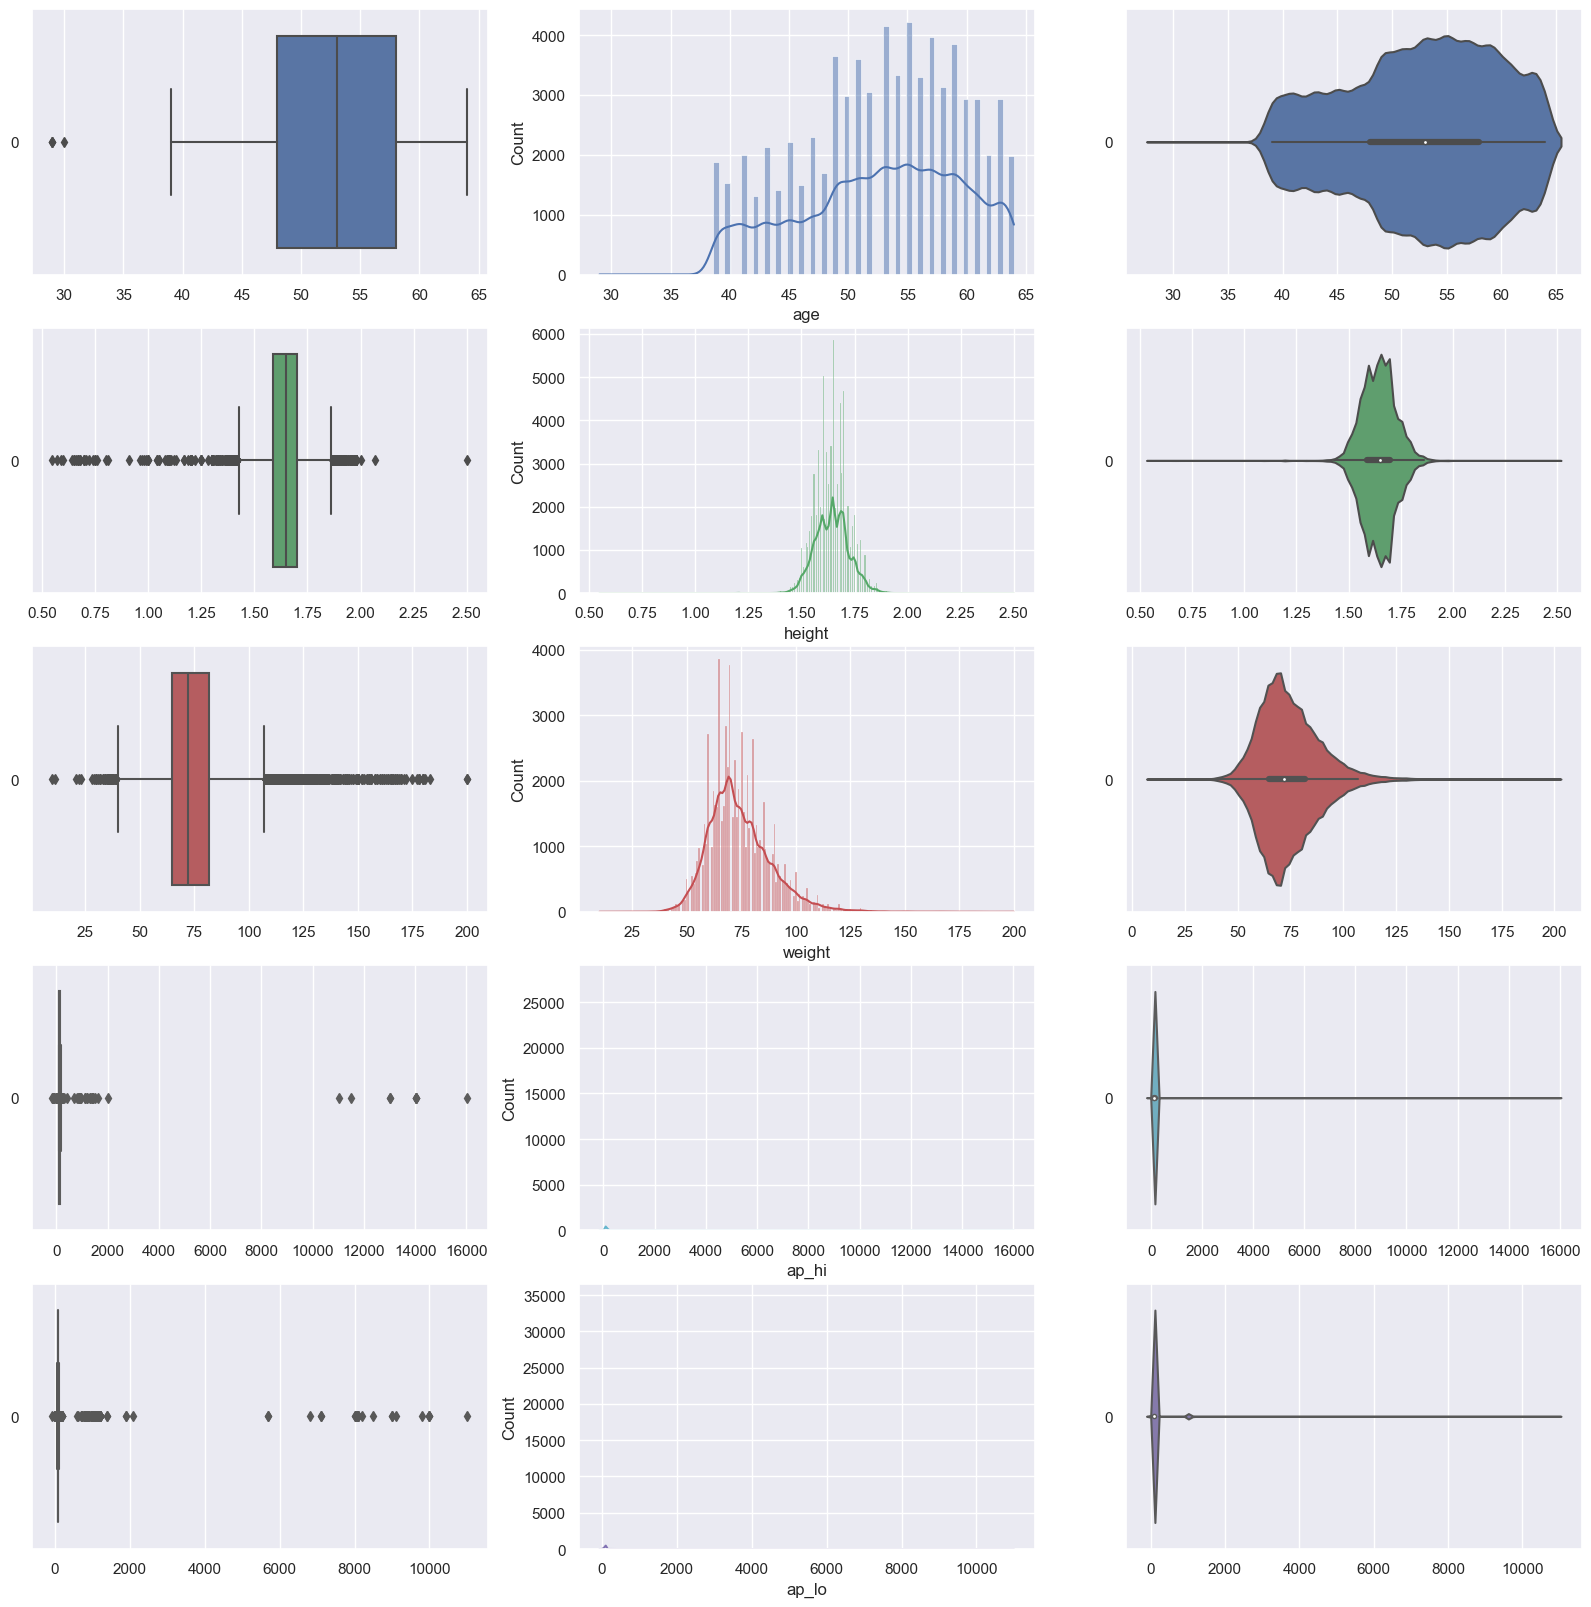

In [36]:
#This takes a thousand eras to run. ~1 minute. 
doPlotting(z, z[num])

We now know that there is an issue with ap_hi and ap_lo. We have to fix the bounding issues. 

https://rstudio-pubs-static.s3.amazonaws.com/517828_8a3252fe1f604347845517e735a518fe.html#:~:text=The%20variabile%20description%20are%20as,%3A%20well%20above%20normal%20%7C%20gluc%20%3A

### TodoList update
1. Remove ap_hi and ap_lo rows that don't make sense. ap_hi, ap_lo within [0, 360]
2. Do data analysis for the non-categorical type to cardio. <br>
3. Do data analysis for categorical type ['cholesterol', 'gluc', 'Male', 'Smoke', 'alco', 'active'] map to ['cardio']. 

In [37]:
def iteratedGate(lstbool : list[bool]):
    """Helper method for removeErroredNumericals. Take a boolean array and apply iterated or and output notted state"""
    ret = lstbool[0]
    for j in range(1, len(lstbool)):
       ret = ret or lstbool[j]
    return not(ret) 
def removeErroredNumericals(upper : float, 
                            lower : float , 
                            intvl : float, 
                            listSeries : list[str], 
                            dataIn, 
                            FnbtwRows : Callable[[list], bool],
                            FnRangeLim : Callable[[list, float], bool]):
    """Remove entire rows that contain errored numericals as dependent on listSeries. 
    [lower, upper] = range
    FnbtwRows : Returns false if proper values. Processes the list of values at row x with the space determined by listSeries.
    FnRangeLim : Returns false if proper values. Process list of values at row x too. """
    serlist = []
    #get a list of all the series' that will be considered into serlist. 
    for var in listSeries:
        serlist.append(dataIn[var])
    #set up holder for rows to be eliminated from dataIn. 
    L_0 = [] 
    #loop for all rows in dataIn space. 
    for i in range(dataIn.shape[0]):
        #set up holder for the values for each row that has headers as listed in listSeries.
        elems = []
        #get number of series' to be considered, create holder. 
        for j in range(len(listSeries)):
            elems.append(serlist[j][i]) #get the values elin the specific row and store it in the value holder elems. 
        #boolean conditions
        #create a boolean list for processing later. 
        #Elems should be a list of values only len(listSeries) in size. 
        FullCond = []
        FullCond.append(FnbtwRows(elems)) #check condition between values in the elems space. 
        FullCond.append(FnRangeLim(elems, intvl)) #check interval condition in elems space.
        #For each series considered, find out if the values lie in the allowed range. 
        for j in range(len(listSeries)): 
            FullCond.append(elems[j] >= upper) 
            FullCond.append(elems[j] <= lower) 
        if(iteratedGate(FullCond)):
            #append values that makes sense to L_0. 
            L_0.append(i)
    dataout = dataIn.iloc[L_0]
    return dataout.reset_index() #need this if not the dataframe index get messed up with index skips, will cause issue downstream. 

In [38]:
#spot non-congruent data and then remove the rows that it occupies. 
testdataccopy = removeErroredNumericals( 
    360, #inclusive. 
    0, #inclusive. 
    100,
    ['ap_hi', 'ap_lo'],
    z,
    lambda s : s[0] < s[1], #this, under normal numbers, should be false. 
    lambda s, t : s[0] - s[1] > t #this, in range, should be false. 
)
testdataccopy = testdataccopy.drop('index', axis=1)
testdataccopy 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Male,1.68,62.0,110,80,Norm,Norm,0,0,100,0
1,55,Female,1.56,85.0,140,90,WellAbvNorm,Norm,0,0,100,100
2,51,Female,1.65,64.0,130,70,WellAbvNorm,Norm,0,0,0,100
3,48,Male,1.69,82.0,150,100,Norm,Norm,0,0,100,100
4,47,Female,1.56,56.0,100,60,Norm,Norm,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68611,52,Male,1.68,76.0,120,80,Norm,Norm,100,0,100,0
68612,61,Female,1.58,126.0,140,90,AbvNorm,AbvNorm,0,0,100,100
68613,52,Male,1.83,105.0,180,90,WellAbvNorm,Norm,0,100,0,100
68614,61,Female,1.63,72.0,135,80,Norm,AbvNorm,0,0,0,100


In [39]:
#Check if it work or not.
pullBloodPressureAnomalies("ap_lo", testdataccopy)
#convert cardio back to binary
testdataccopy = convertToBin(['cardio'], testdataccopy)

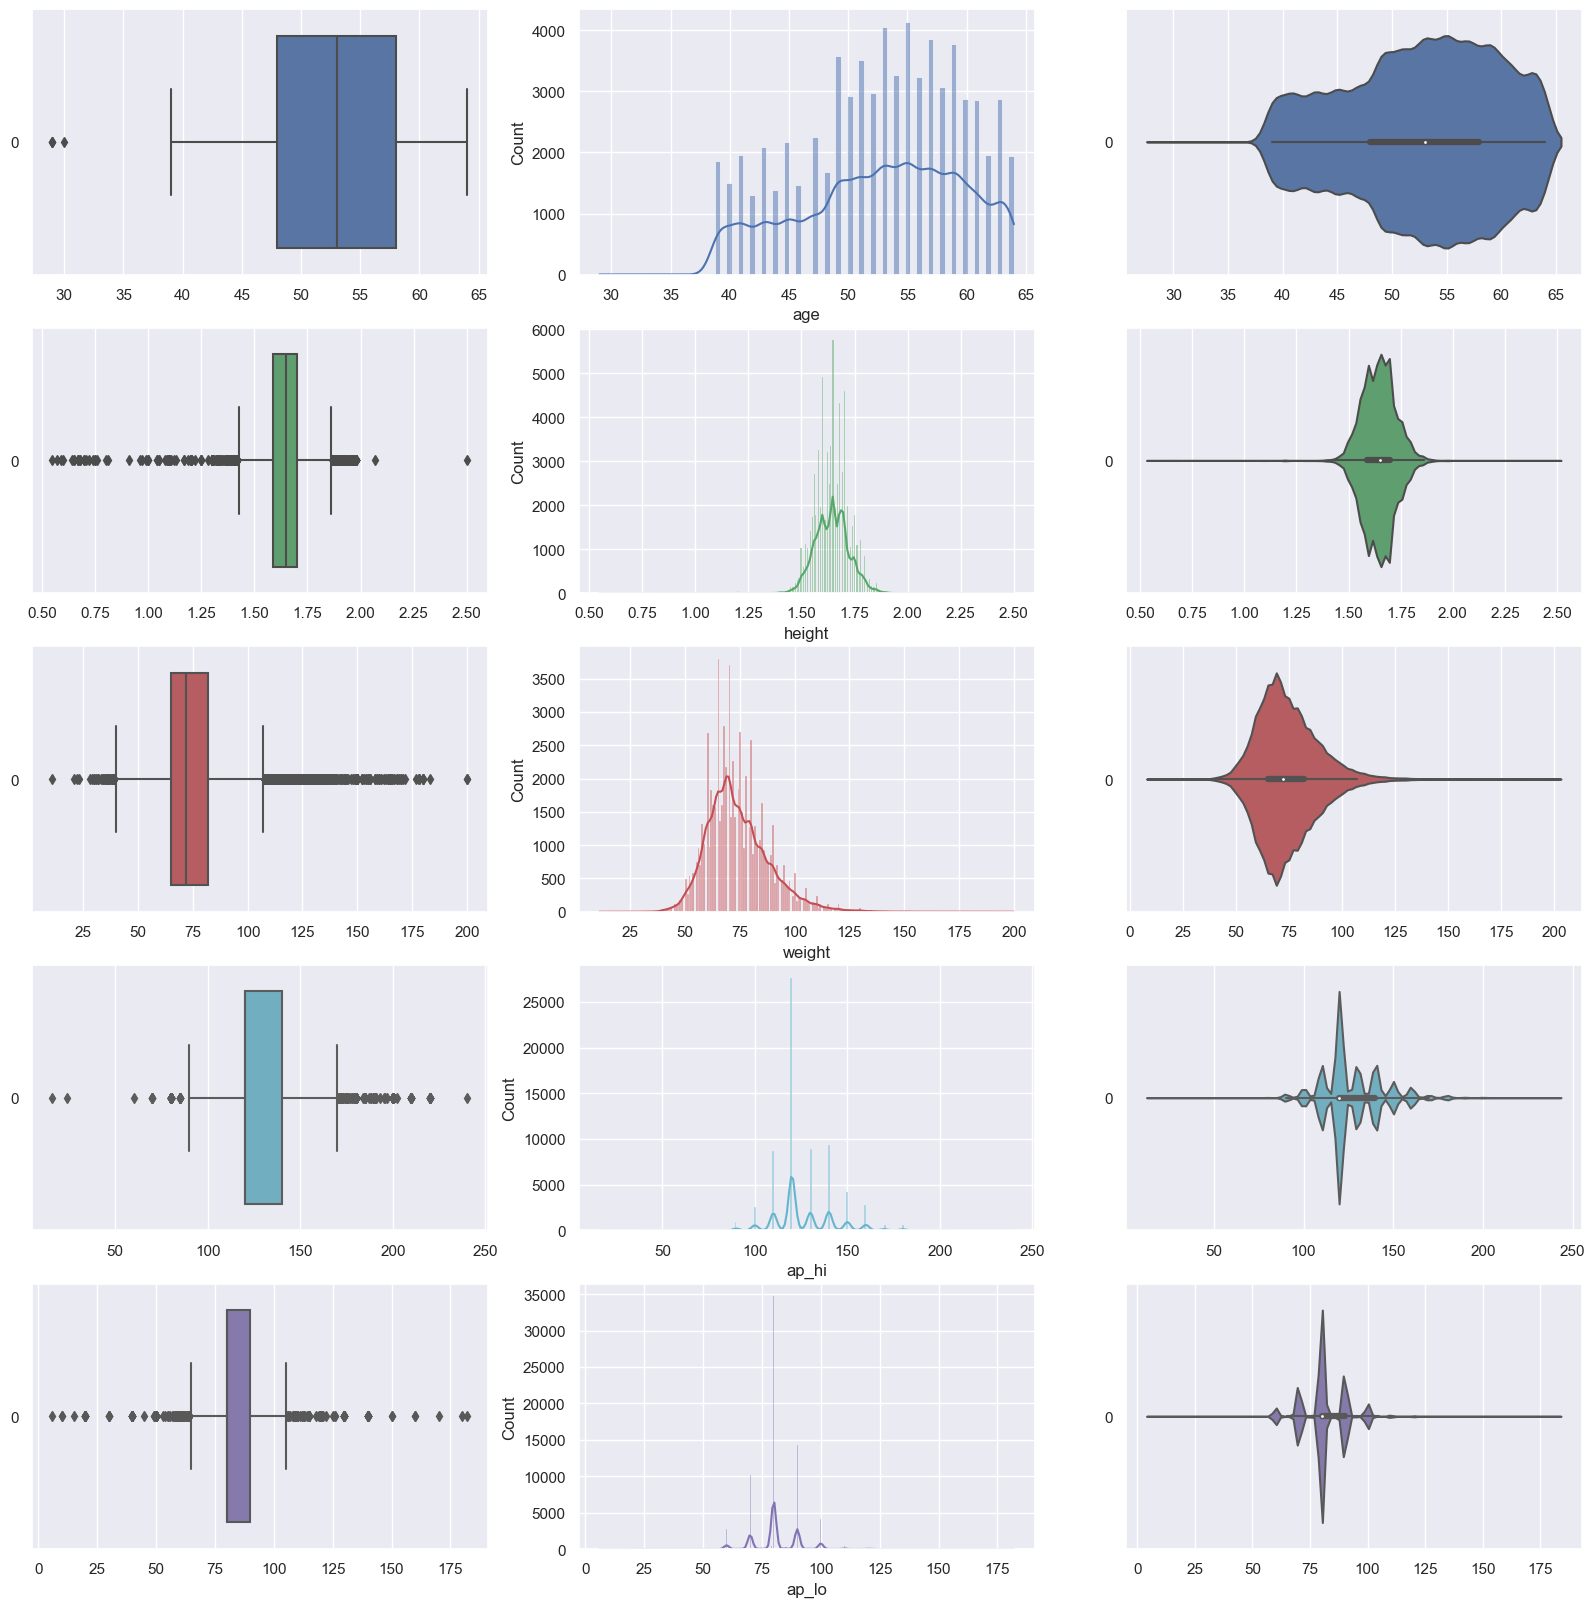

In [40]:
doPlotting(testdataccopy, testdataccopy[num])

Now we do each numerical to cardio

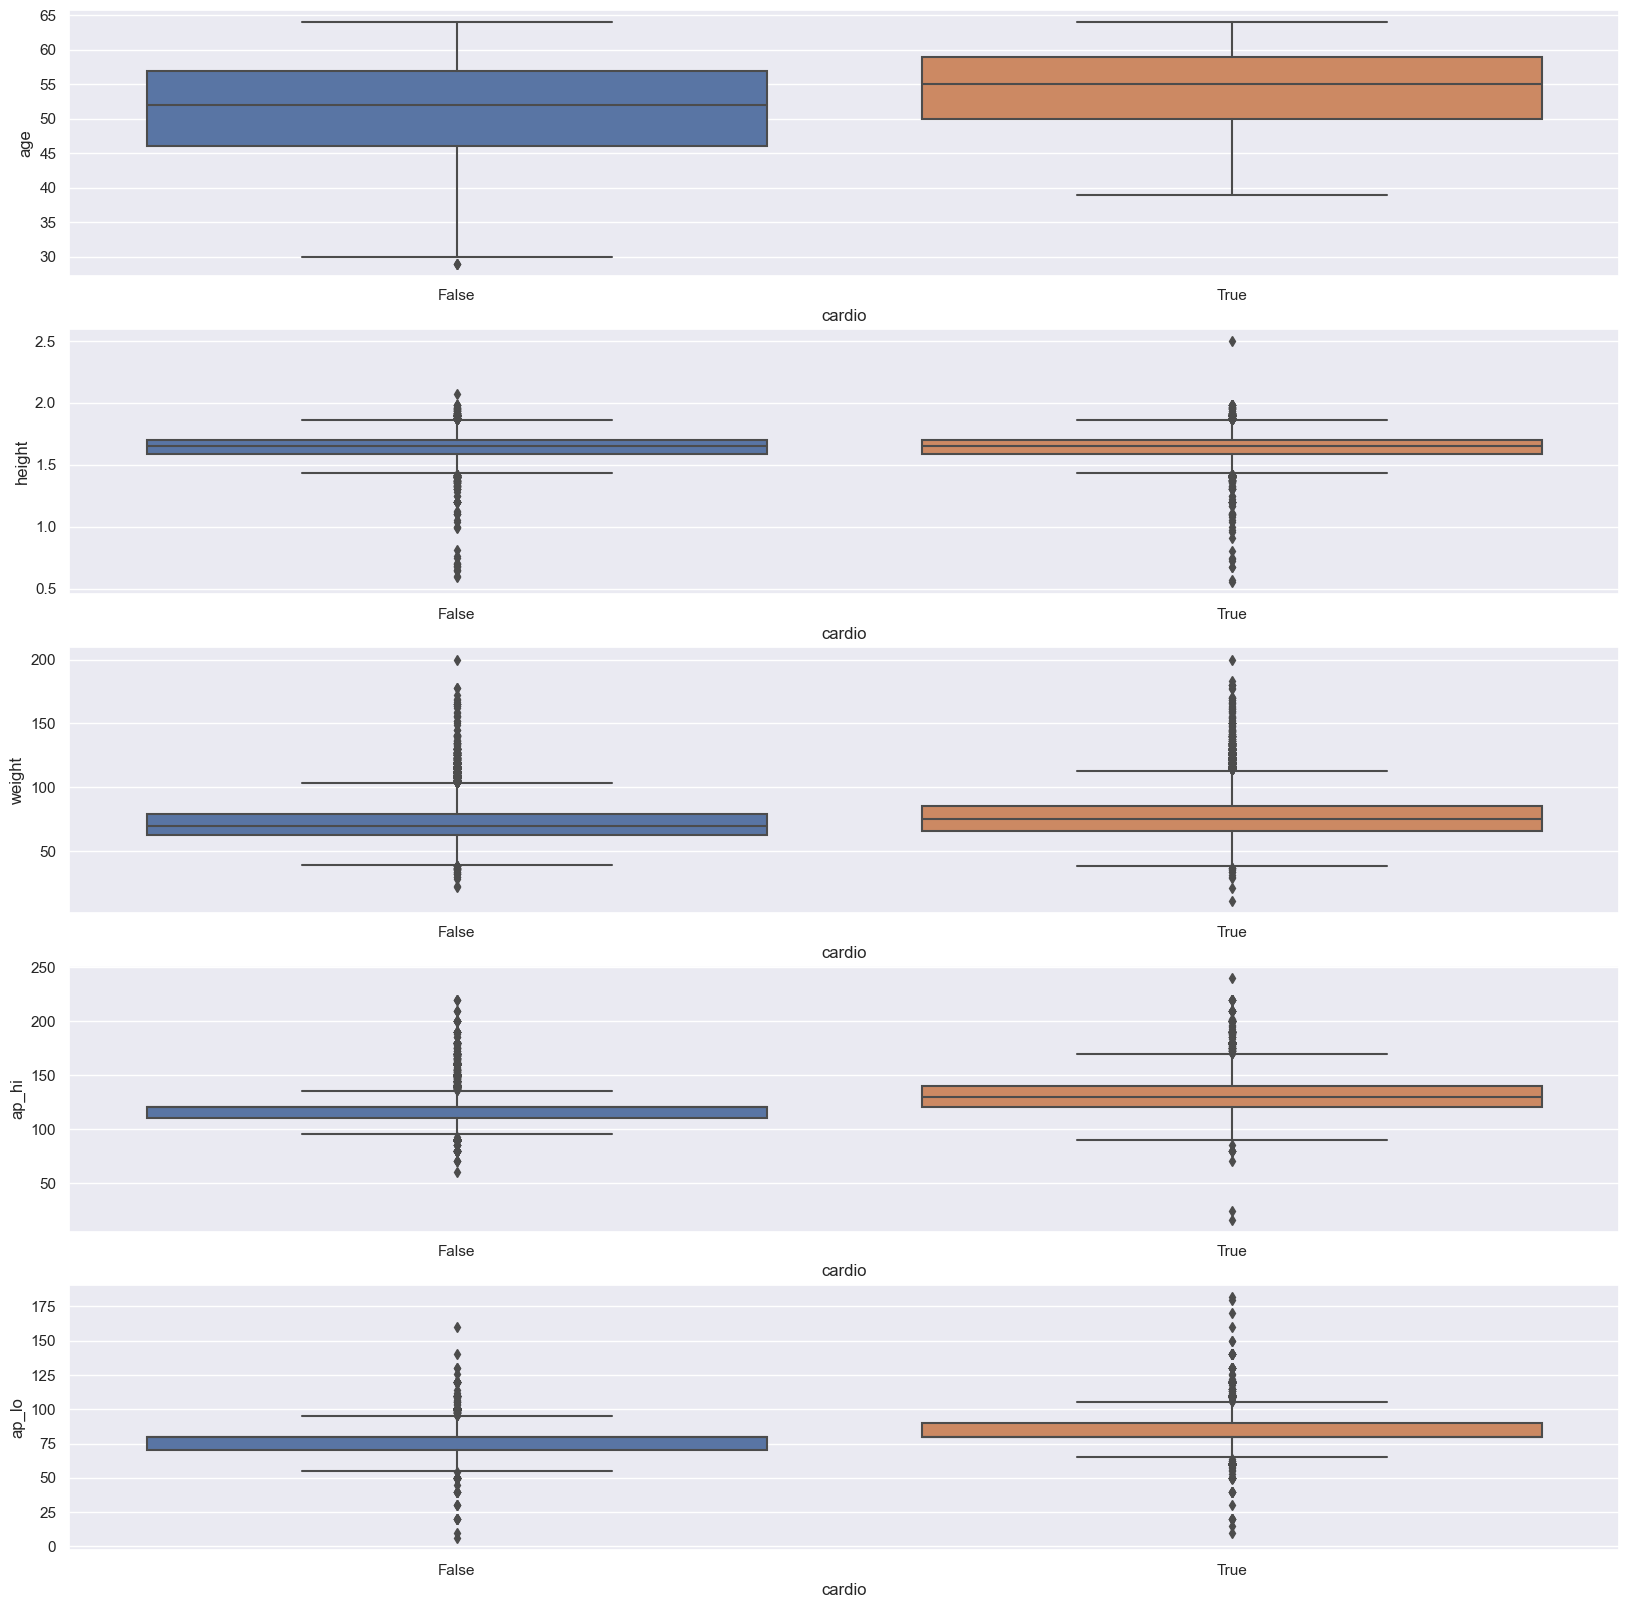

In [41]:
#Do test of numerical to cardio. 
f, axes = plt.subplots(len(num), 1, figsize = (20, 20))
i = 0
for var in num:
    sb.boxplot(x = 'cardio', y = var, data = testdataccopy, ax = axes[i])
    i += 1

<AxesSubplot:xlabel='cardio', ylabel='height'>

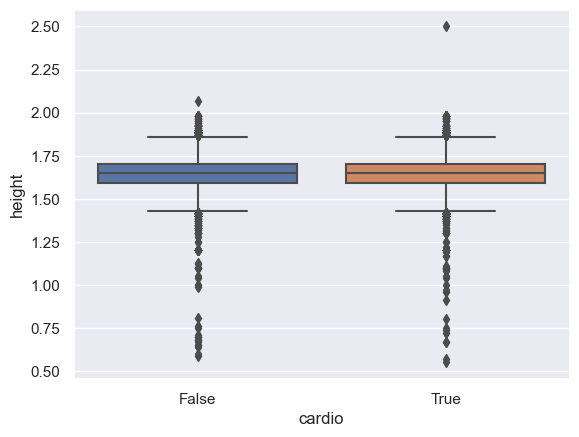

In [42]:
#Particularly height
sb.boxplot(x = 'cardio', y = 'height', data = testdataccopy)

In [43]:
def plotdiffbetweenTF(first : str, second_with_boolean_only : str, show : bool = True):
    """Generate list that contains difference in data description between first_true and first_false according to second.
    The first labels that generate represent labels between ind. lists."""
    dfarr = pd.DataFrame(testdataccopy[[first, second_with_boolean_only]])
    datTrue = []
    datFalse = []
    for i in range(dfarr.shape[0]):
        state : bool = dfarr.iloc[i][1]
        spltht : float = dfarr.iloc[i][0]
        if state :
            datTrue.append(spltht)
        else:
            datFalse.append(spltht)
    datfdesc = pd.DataFrame(datFalse).describe()
    dattdesc = pd.DataFrame(datTrue).describe()
    datdatdatdiff = []
    #difference between the two
    if show:
        print(first + " against " + second_with_boolean_only, end=":\r\n")
    for i in range(len(datfdesc)):
        stattype = datfdesc[0].keys()[i]
        diff = datfdesc[0][i] - dattdesc[0][i]
        dat_0 = int(diff) if stattype=='count' else round(diff, 3)
        datdatdatdiff.append(dat_0)
        #print(stattype.capitalize() + ' difference: ', dat_0)
    return (len(datTrue) - len(datFalse), datdatdatdiff)
#function for special summation. Strict bounded function. 
def sum_of(list_in_real : list[int], function : Callable[[float], float]):
    output_ : float = 0.0
    for i in list_in_real:
        output_ += function(i)
    return output_

In [44]:
#extract the data descriptions from one num variable in [num] to cardio(T/F). 
#Then combine together, ignoring signs
_diff = {}
for var in num:
    diff_ind = plotdiffbetweenTF(var, 'cardio', False)[1]
    #Now we add everything together, not caring about sign convention just to prove a point.
    _diff.update({var : sum_of(diff_ind, abs) - 780})
min(_diff, key = _diff.get)

'height'

From _diff printed above, we can see that height has the least variation between False and True, and hence, I am going 
to ignore it. 

In [45]:
import math
c = 2.99792458*10E8
h = 6.62607015*10E-34
k = 1.380649*10E-23
def plancklaw(wavelength, temp):
    d0 = wavelength ** 5
    d1 = 2 * math.pi * h * c ** 2
    d2 = h * c / k
    d3 = 1 / (wavelength * temp)
    return d1 / d0 * 1 / (math.exp(d2 * d3) - 1)
def plancklawf(temp):
    return plancklaw(500 * 10E-5, temp)
sum_of([11, 423, 113, 81, 35, 2290, 43, 800, 1002], plancklawf)

0.0019911362731755374

In [46]:
#filter out categoricals(properly this time, since we use the original data, we do not need the numericals.)
z0 = removeErroredNumericals( 
    360, #inclusive. 
    0, #inclusive. 
    100,
    ['ap_hi', 'ap_lo'],
    data.copy(),
    lambda s : s[0] < s[1], #this, under normal numbers, should be false. 
    lambda s, t : s[0] - s[1] > t #this, in range, should be false. 
)
catthresh = 3
#for each series in the z0. 
serieshldr = []
for series in z0:
    max_out = z0[series].max()
    if max_out <= 3:
        serieshldr.append(series)
data_catFullUnchanged = pd.DataFrame(z0[serieshldr])
#check. 
data_catFullUnchanged

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,2,1,1,0,0,1,0
1,1,3,1,0,0,1,1
2,1,3,1,0,0,0,1
3,2,1,1,0,0,1,1
4,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...
68611,2,1,1,1,0,1,0
68612,1,2,2,0,0,1,1
68613,2,3,1,0,1,0,1
68614,1,1,2,0,0,0,1


In [47]:
#Then convert gender to actual gender
mapdat(data_catFullUnchanged, ['gender'], map_from = [1, 2], map_to = ["Female", "Male"])
#Convert 1, 2, 3 to normal, above normal and well above normal. 
mapdat(data_catFullUnchanged, ['cholesterol', 'gluc'], map_from = [1, 2, 3], map_to = ["Norm", "AbvNorm", "WellAbvNorm"])
#binary conversion
data_catFullUnchanged = convertToBin(binForm, data_catFullUnchanged)

C:\Users\TBNRd\AppData\Local\Temp\ipykernel_9092\890261517.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataIn[col][i] = content


Check each variable against cardio. 

In [48]:
data_catFullUnchanged

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,Male,Norm,Norm,False,False,True,False
1,Female,WellAbvNorm,Norm,False,False,True,True
2,Female,WellAbvNorm,Norm,False,False,False,True
3,Male,Norm,Norm,False,False,True,True
4,Female,Norm,Norm,False,False,False,False
...,...,...,...,...,...,...,...
68611,Male,Norm,Norm,True,False,True,False
68612,Female,AbvNorm,AbvNorm,False,False,True,True
68613,Male,WellAbvNorm,Norm,False,True,False,True
68614,Female,Norm,AbvNorm,False,False,False,True


In [49]:
#Looks like I have to create my own function to analyse. No matter. 
def getSummary(seriesName : str, df):
    rengeVal = list(df[seriesName].value_counts().keys()) #get possible values. Should be small and non-contd.
    #here we compare to cardio directly, no more playing around. Cardio is boolean. 
    totalcount = df.shape[0] #get actual row count. 
    holder = {} #instantiate dictionary
    #loop through possible values in seriesName
    for var in rengeVal:
        true_i = 0
        false_i = 0
        #then loop through the rows
        for i in range(totalcount):
            #then loop through the booleans
            content = df[seriesName][i]
            state = df['cardio'][i]
            if content == var:
                if state:
                    true_i += 1
                else:
                    false_i += 1
            else:
                pass
        #get string keys
        true_key = var + ":" + "True"
        false_key = var + ":" + "False"
        holder.update({true_key : true_i})
        holder.update({false_key : false_i})
    return (holder, rengeVal) #return tuple to pass renge(i.e. range of values of element)

def getFullSummary(seriesLst : str, df):
    holder = []
    for seriesName in seriesLst:
        holder.append({seriesName : getSummary(seriesName, df)})
    return holder

In [50]:
#print out relation between the categoricals to cardio. As stated above, we will ignore the other booleans. 
summ = getFullSummary(categorical, data_catFullUnchanged)

In [51]:
#Compare the true and false separately. 
#AND no, I'm not going to stuff this into a goddamn function. 
ser_d = [summ[0][categorical[0]], summ[1][categorical[1]], summ[2][categorical[2]]]
print("Format: ", ser_d[0][1],",", ser_d[1][1],",", ser_d[2][1])
#first compare true for all three groups. 
res_0_p = [val for key, val in ser_d[0][0].items() if 'True' in key]
res_1_p = [val for key, val in ser_d[1][0].items() if 'True' in key]
res_2_p = [val for key, val in ser_d[2][0].items() if 'True' in key]
print("CardioTrue", [res_0_p, res_1_p, res_2_p], sep=":")
#now compare false for all three groups. 
res_0 = [val for key, val in ser_d[0][0].items() if 'False' in key]
res_1 = [val for key, val in ser_d[1][0].items() if 'False' in key]
res_2 = [val for key, val in ser_d[2][0].items() if 'False' in key]
print("CardioFalse", [res_0, res_1, res_2], sep=":")
miyo = [[res_0_p, res_1_p, res_2_p], [res_0, res_1, res_2]] #store the separated True and False into an array for downstream. 

Format:  ['Female', 'Male'] , ['Norm', 'AbvNorm', 'WellAbvNorm'] , ['Norm', 'WellAbvNorm', 'AbvNorm']
CardioTrue:[[21975, 11944], [22401, 5528, 5990], [27727, 3212, 2980]]
CardioFalse:[[22724, 11973], [29075, 3755, 1867], [30619, 1994, 2084]]


In [54]:
# #function to convert cats to short-form. Meow. 
class Shortform:
    
    catlist = []
    
    def __init__(self, miyauchi : set, labels : list):
        listf = list(miyauchi)
        listf.sort()
        self.catlist = listf + labels
        
    def shorter(self, inputstr : str):
        if inputstr == self.catlist[5]:
            return 'Gdr'
        elif inputstr == self.catlist[6]:
            return 'Chol'
        elif inputstr == self.catlist[7]:
            return 'Gluc'
        elif inputstr == self.catlist[1]:
            return 'Female' #no change
        elif inputstr == self.catlist[2]:
            return 'Male'
        elif inputstr == self.catlist[3]:
            return 'Norm'
        elif inputstr == self.catlist[0]:
            return 'AbvNm'
        elif inputstr == self.catlist[4]:
            return 'WellAbvNm'
        else:
            return ''
#for downstream
hotaru = [ser_d[0][1], ser_d[1][1], ser_d[2][1]] 

               True(Cardio)  False(Cardio)
Category                                  
Female                21975          22724
Male                  11944          11973
CholNorm              22401          29075
CholAbvNm              5528           3755
CholWellAbvNm          5990           1867
GlucNorm              27727          30619
GlucWellAbvNm          3212           1994
GlucAbvNm              2980           2084


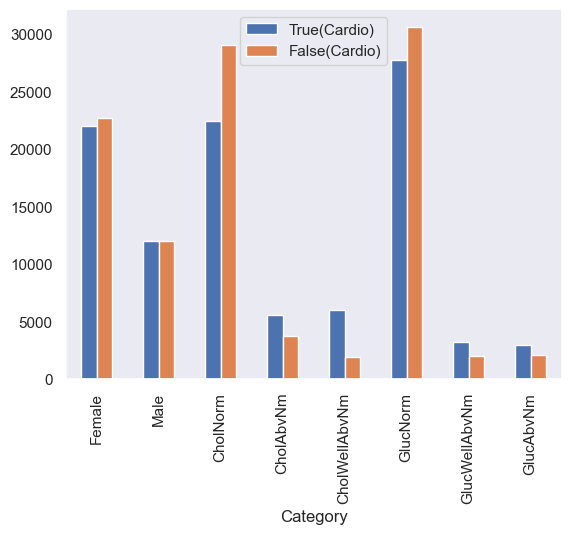

In [55]:
from io import StringIO

rengeValarr = []
#Get range of values in each element and put into groups
for i in range(len(categorical)):
    rengeVal = list(data_catFullUnchanged[categorical[i]].value_counts().keys()) #get possible values. Should be small and non-contd.
    rengeValarr.append(rengeVal)
#flatten the groups
rengeVal1D = [item for sublist in rengeValarr for item in sublist]
#send it to shortform class and concat categorical. 
stfm = Shortform(set(rengeVal1D), categorical)
#initialize the passin string. In CSV format. 
passin = "Category"
#add in schedules
passin += ";True(Cardio);False(Cardio)\r\n" #miyo is list[int]
#populate with data from summary above. Miyo and Hotaru hold data and labels respectively. 
for i in range(len(categorical)):
    for j in range(len(hotaru[i])):
        #miyo is list[int]. String should be in csv format. 
        passin += stfm.shorter('' if (categorical[i] == 'gender') else categorical[i]) + stfm.shorter(hotaru[i][j]) + ';' + str(miyo[0][i][j]) + ';' + str(miyo[1][i][j]) + '\r\n'
#create csv form
s = StringIO(passin)
#create dataframe from csv 
df = pd.read_csv(s, index_col=0, delimiter=';')
#double check 
print(df)
#finally, plot the bar graph scheduled to boolean states. 
df.plot( kind= 'bar' , secondary_y= 'True' , rot= 90 )
plt.show()